### Breast cancer Diagnosis

AIDI 1002 - Ex1

Sayeed Ahmed - 100853349

### Step1: Import Modules

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Step 2: Load the data 

In [2]:
#Load Dataset
dataset=pd.read_csv('dataset.csv')
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
568,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666


### Step 3: Analyze the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [4]:
#Show Key Statistics
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Class Split
B    357
M    212
Name: diagnosis, dtype: int64


Text(0, 0.5, 'Count')

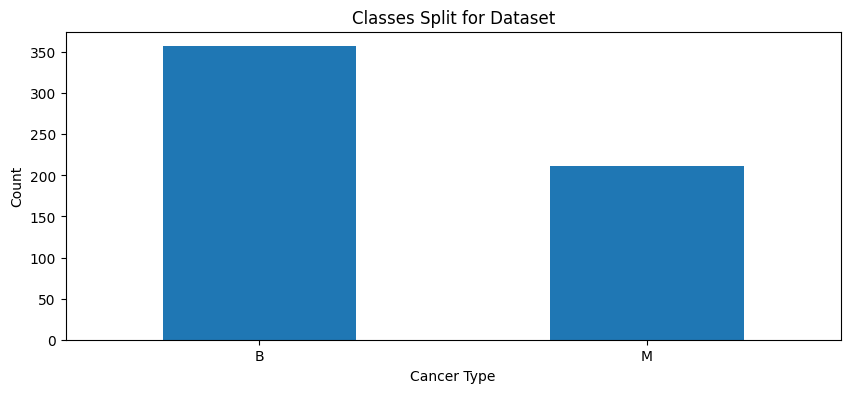

In [5]:
#Class Balance
print('Class Split')
print(dataset['diagnosis'].value_counts())
dataset['diagnosis'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset',rot=0)
plt.xlabel('Cancer Type')
plt.ylabel('Count')

Missing values

In [6]:
dataset.isnull().any()

id                   False
diagnosis            False
radius_mean          False
texture_mean         False
perimeter_mean       False
area_mean            False
smoothness_mean      False
compactness_mean     False
concavity_mean       False
points_mean          False
symmetry_mean        False
dimension_mean       False
radius_se            False
texture_se           False
perimeter_se         False
area_se              False
smoothness_se        False
compactness_se       False
concavity_se         False
points_se            False
symmetry_se          False
dimension_se         False
radius_worst         False
texture_worst        False
perimeter_worst      False
area_worst           False
smoothness_worst     False
compactness_worst    False
concavity_worst      False
points_worst         False
symmetry_worst       False
dimension_worst      False
dtype: bool

- There are no missing values in dataframe

Duplicate values

In [7]:
duplicateRows = dataset[dataset.duplicated()]
duplicateRows.count()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

- There are no duplicate values in our dataset

Correlation Map

<ipython-input-8-51ca825acb55>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


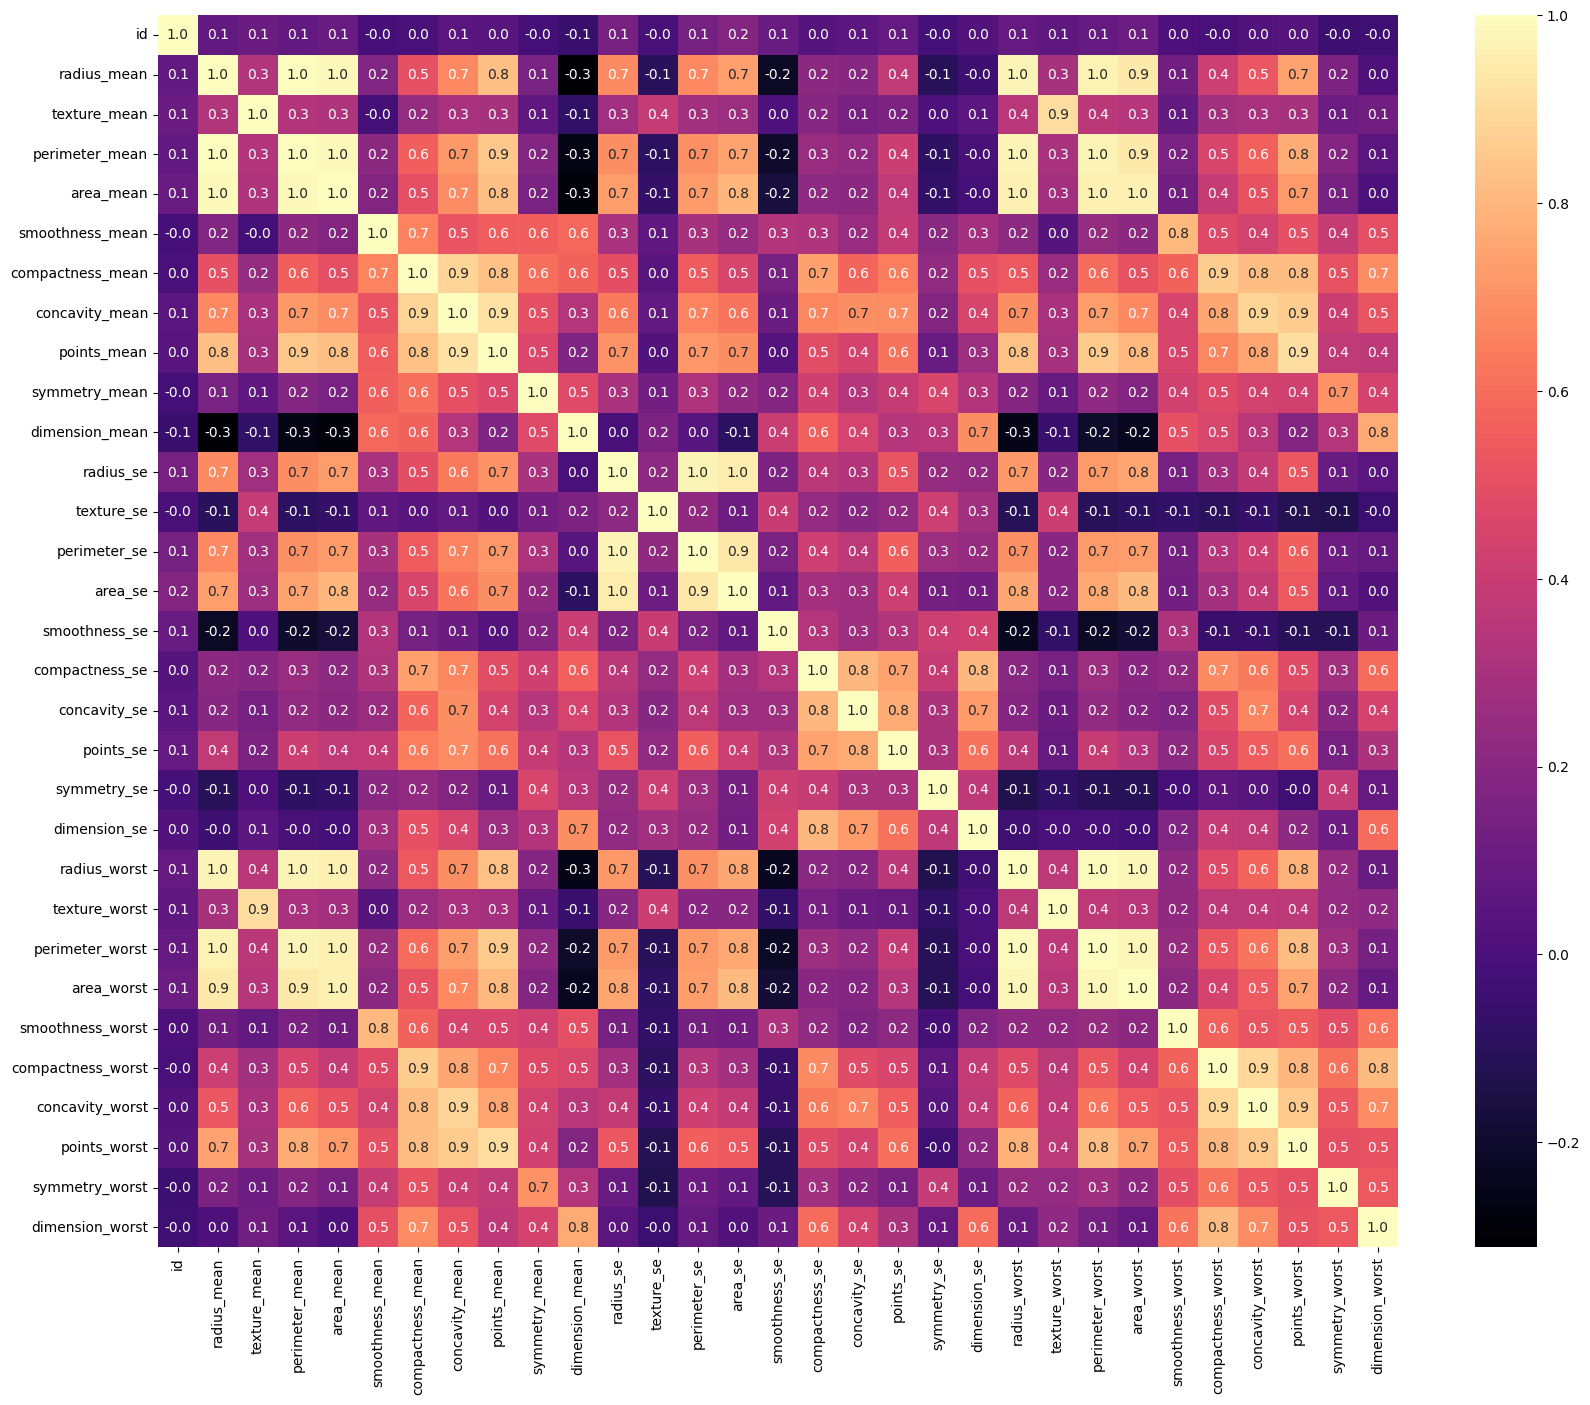

In [8]:
corr = dataset.corr()
fig = plt.figure(figsize = (20, 16))
sns.heatmap(corr, annot=True, 
           cmap='magma', 
           fmt=".1f")
plt.show()

Visuals

In [9]:
for i in dataset.columns:
    fig = px.histogram(dataset, 
                   x=i, 
                   marginal='box', 
                   text_auto=True,
                   color_discrete_sequence  = ['blue'],
                   template='simple_white',
                   title=i.upper() + ' HISTOGRAM')

    fig.update_layout(xaxis_title=i,yaxis_title="Count", bargap=0.1)
    
    fig.show()

### Step 4: Preprocessing

Encode Categorical Variable - Diagnosis

Malignant(M) - 0
; Benign(B) - 1

In [10]:
def encode(variable_y):
   Encoder = LabelEncoder()
   y = Encoder.fit_transform(variable_y)
   return y

dataset['diagnosis'] = encode(dataset['diagnosis'])

Outlier Detection

In [11]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators = 100, contamination = 0.03, max_samples ='auto')
prediction = iforest.fit_predict(dataset)
scores = iforest.score_samples(dataset)

# new outlier denoting column 
dataset['if_outlier'] = list(prediction)
# replace 1,-1 to 0,1
dataset['if_outlier'].replace([-1,1],[1,0],inplace=True)

# storing outlier records to csv file
df_outlier = dataset[dataset['if_outlier']==1]
#df_outlier.to_csv('outlier_dataset.csv',index=False)
percent = (len(df_outlier)/len(dataset))*100
print('Original dataset: ',len(dataset))
print('Outlier Detected: ',len(df_outlier),"(",round(percent,3),"%)")

# dropping outliers from preprocessed_data
dataset.drop(df_outlier.index, inplace=True)
dataset.drop('if_outlier',axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Original dataset:  569
Outlier Detected:  18 ( 3.163 %)


- We detected outlier count to be 3% of our dataset and we dropped them

In [12]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
564,911320502,0,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,0,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,1,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,0,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
568,9012795,1,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666


Feature Scaling

In [13]:
dataset.drop("id", axis=1, inplace=True)
x = dataset.drop(columns='diagnosis')
y = dataset['diagnosis']

In [14]:
# Now, we will perform feature scaling for the dataset "X" using StandardScaler and convert the list to a dataframe
X = StandardScaler().fit_transform(x) # mean = 0, standard deviation = 1
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.502989,-1.600450,-0.531206,-0.544195,0.515992,-0.643512,-0.605339,-0.264970,0.615855,-0.448628,...,-0.564128,-1.642309,-0.598864,-0.586824,0.304438,-0.827562,-0.702520,-0.276080,-0.086530,-0.938267
1,-1.024876,-0.057393,-0.955188,-0.914309,0.081379,0.299123,-0.263137,-0.560061,0.473369,0.375737,...,-0.920101,-0.432365,-0.876844,-0.826684,-0.466235,0.048395,-0.350806,-0.506935,0.112687,-0.440275
2,-0.891370,-0.556064,-0.882530,-0.830035,0.875723,-0.470692,-0.739511,-0.605245,-0.327633,0.143500,...,-0.803640,0.147745,-0.824063,-0.736761,0.232748,-0.676076,-0.793840,-0.584937,0.214939,-0.260851
3,-0.818549,-1.365228,-0.790380,-0.793558,1.514427,0.276025,-0.512945,0.040719,-0.108128,-0.268683,...,-0.911311,-1.620762,-0.932823,-0.808931,0.223787,-0.437624,-0.898259,-0.398993,-1.364688,-0.930333
4,0.367834,-1.407568,0.301694,0.234712,-1.185018,-0.653381,-0.690034,-0.555877,-0.300677,-1.080743,...,0.029160,-1.627392,-0.038107,-0.065809,-0.856052,-0.497237,-0.639900,-0.467225,-0.685942,-0.941318


Train-Test Split

In [15]:
# Splitting X and Y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Model Building

In [16]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline
pipeline =[]

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=100))])
pipeline.insert(0,pipe_rdf)

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(random_state=100))])
pipeline.insert(1,pipe_dt)

pipe_knn = Pipeline([#('scl', StandardScaler()),
                     ('knn', KNeighborsClassifier())])
pipeline.insert(2, pipe_knn)

# Set grid search params 
modelpara =[]
param_gridrdf = {
            'clf__criterion':['gini','entropy'],
            'clf__n_estimators': [100,150,200],
            'clf__bootstrap': [True, False]}
modelpara.insert(0,param_gridrdf)

max_depth = range(1,100)
param_griddt = {'clf__criterion':['gini','entropy'],
                'clf__max_depth':max_depth}
modelpara.insert(1,param_griddt)


In [17]:
models=[]
models.append(('Decision Tree',pipe_dt))
models.append(('Random Forest',pipe_rdf))
#models.append(('K Neighborsa',pipe_knn))

In [18]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params,cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\n')
    
    #Feature Importance - optimized
    print('Feature Importances')
    #for name, score in zip(list(dataset),gs_clf.best_estimator_.named_steps['clf'].feature_importances_):
        #print(name, round(score,2))
    
    #Output Validation Statistics
    target_names=['Malignant','Benign']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names))   

In [19]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: RandomForestClassifier(random_state=100)


Feature Importances

Best Parameters: {'clf__bootstrap': False, 'clf__criterion': 'entropy', 'clf__n_estimators': 150}

 [[95  4]
 [ 2 37]]

               precision    recall  f1-score   support

   Malignant       0.98      0.96      0.97        99
      Benign       0.90      0.95      0.92        39

    accuracy                           0.96       138
   macro avg       0.94      0.95      0.95       138
weighted avg       0.96      0.96      0.96       138


Optimized Model

Model Name: DecisionTreeClassifier(random_state=100)


Feature Importances

Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 7}

 [[92  7]
 [ 3 36]]

               precision    recall  f1-score   support

   Malignant       0.97      0.93      0.95        99
      Benign       0.84      0.92      0.88        39

    accuracy                           0.93       138
   macro avg       0.90      0.93      0.91       138
w

Random Forest Provides the best performance metrics